# Market Structure and Concentration


## Tujuan
Analisis ini melihat struktur pasar industri video game lewat:
- Distribusi penjualan.
- Konsentrasi publisher dan platform.
- Perbandingan volume rilis vs kualitas penjualan.


### Load Data


In [8]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

cwd = Path.cwd()
if (cwd / 'data').is_dir():
    data_path = cwd / 'data' / 'processed' / 'vgsales.csv'
else:
    data_path = cwd.parent / 'data' / 'processed' / 'vgsales.csv'

df = pd.read_csv(data_path)
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales,Share_NA,Share_EU,Share_JP,decade_cohort
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,0.501450,0.350737,0.045564,2000.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,0.722664,0.088966,0.169235,1980.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,0.442367,0.359475,0.105777,2000.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,0.477273,0.333636,0.099394,2000.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,0.359146,0.283301,0.325685,1990.0


**Interpretasi**

Analisis dilakukan pada level agregasi publisher dan platform. Fokusnya adalah siapa yang dominan dan seberapa terkonsentrasi pasarnya.


### Agregasi publisher
Menghitung total sales dan jumlah title unik per publisher.


In [ ]:
publisher_sales = (
    df.groupby("Publisher", as_index=False)
      .agg(
          total_sales=("Total_Sales", "sum"),
          title_count=("Name", "nunique")
      )
      .sort_values("total_sales", ascending=False)
)

publisher_sales.head(10)


,Publisher,total_sales,title_count
359,Nintendo,1786.36,667
138,Electronic Arts,1110.15,606
21,Activision,727.11,417
456,Sony Computer Entertainment,607.49,622
525,Ubisoft,474.51,572
494,Take-Two Interactive,399.70,201
488,THQ,340.65,409
275,Konami Digital Entertainment,283.46,640
446,Sega,272.95,480
347,Namco Bandai Games,253.91,776


Total sales menunjukkan dominasi. Title count membantu membedakan apakah dominasi datang dari banyak rilis atau dari penjualan per game yang tinggi.


### Publisher efficiency
Metrik `sales_per_title` mengukur efisiensi rata-rata penjualan per game.


In [10]:
publisher_sales["sales_per_title"] = publisher_sales["total_sales"] / publisher_sales["title_count"]
publisher_sales.sort_values("sales_per_title", ascending=False).head(10)


,Publisher,total_sales,title_count,sales_per_title
385,Palcom,4.17,1,4.170000
334,Mojang,2.91,1,2.910000
66,Bethesda Softworks,82.06,29,2.829655
359,Nintendo,1786.36,667,2.678201
424,Red Orb,5.25,2,2.625000
40,Arena Entertainment,4.72,2,2.360000
522,UEP Systems,2.26,1,2.260000
426,RedOctane,8.69,4,2.172500
549,Warner Bros. Interactive Entertainment,153.90,73,2.108219
288,LucasArts,87.30,42,2.078571


Publisher dengan `sales_per_title` tinggi biasanya bergantung pada hit besar atau punya konsistensi kualitas yang kuat.


### Market share dan konsentrasi
Mengukur proporsi pasar serta kontribusi pemain teratas.


In [11]:
total_market_sales = publisher_sales["total_sales"].sum()
publisher_sales["market_share"] = publisher_sales["total_sales"] / total_market_sales

top5_share = publisher_sales.head(5)["market_share"].sum()
top10_share = publisher_sales.head(10)["market_share"].sum()

top5_share, top10_share


(np.float64(0.5277814229714496), np.float64(0.7017042682413902))

Jika top 5 dan top 10 menguasai porsi besar, pasar cenderung terkonsentrasi. Ini sejalan dengan pola winner‑takes‑most.


### Visual konsentrasi publisher
Kurva kumulatif dipakai untuk melihat apakah dominasi terkonsentrasi di sedikit publisher.


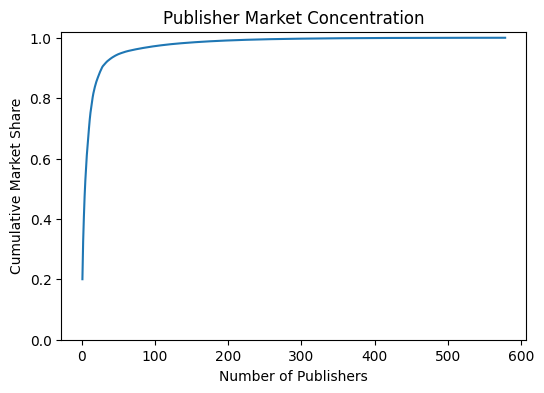

In [12]:
publisher_sorted = publisher_sales.sort_values("total_sales", ascending=False).reset_index(drop=True)
publisher_sorted["cum_share"] = publisher_sorted["market_share"].cumsum()

plt.figure(figsize=(6, 4))
plt.plot(publisher_sorted.index + 1, publisher_sorted["cum_share"])
plt.xlabel("Number of Publishers")
plt.ylabel("Cumulative Market Share")
plt.title("Publisher Market Concentration")
plt.ylim(0, 1.02)
plt.show()


Kurva yang naik tajam di awal menandakan konsentrasi tinggi. Kurva yang lebih landai menunjukkan pasar lebih tersebar.


### Agregasi platform
Platform dianalisis terpisah karena berperan sebagai ekosistem distribusi konten.


In [15]:
platform_sales = (
    df.groupby("Platform", as_index=False)
      .agg(
          total_sales=("Total_Sales", "sum"),
          title_count=("Name", "nunique")
      )
      .sort_values("total_sales", ascending=False)
)

platform_sales.head()


,Platform,total_sales,title_count
16,PS2,1255.77,2161
28,X360,979.60,1264
17,PS3,957.89,1327
26,Wii,926.05,1324
4,DS,821.46,2163


Platform dengan total sales besar menunjukkan ekosistem kuat, namun perlu dicek apakah dominasi terjadi karena volume rilis atau efisiensi per title.


### Platform efficiency
Mengukur `sales_per_title` untuk membandingkan platform secara lebih adil.


In [16]:
platform_sales["sales_per_title"] = platform_sales["total_sales"] / platform_sales["title_count"]
platform_sales.sort_values("sales_per_title", ascending=False).head(10)


,Platform,total_sales,title_count,sales_per_title
5,GB,255.46,98,2.606735
11,NES,251.05,98,2.561735
8,GEN,28.35,27,1.050000
23,SNES,200.04,239,0.836987
18,PS4,278.16,336,0.827857
28,X360,979.60,1264,0.775000
0,2600,96.98,133,0.729173
17,PS3,957.89,1327,0.721846
26,Wii,926.05,1324,0.699434
10,N64,218.68,319,0.685517


Platform dengan `sales_per_title` tinggi cenderung menghasilkan performa rata-rata game yang lebih kuat, bukan hanya banyak judul.


## Ringkasan output notebook
- Tabel publisher dan platform untuk market structure.
- Metrik konsentrasi top 5 dan top 10 publisher.
- Kurva kumulatif konsentrasi publisher untuk membaca dominasi secara cepat.
